<p style="font-size:30px">Analysis of Education System's data </p>

<br>
This notebook corresponds to the second project of my data scientist path with OpenClassrooms/CentralSupelec 

This project is an introduction to data science projects' methodology.

The notebook contains the following steps:<br>

* Basic Exploratory Data Analysis:
    * Data Overview
    * NaNs observation
   
* Relevant data selection (choose most relevant indicators) 
* Basic Data imputation
* Scoring system to rate countries based on the chosen indicators

___
<b>I strongly recommend to use the 'table of content' extension of Jupyter to navigate through this notebook </b>

# Imports 

In [1]:
#import packages + Data
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import interpolate
import plotly.express as px

data= pd.read_csv("EdStatsData.csv")
#Keeping a data frame with the raw data 
raw_data = data.copy()
country = pd.read_csv("Country.csv",sep=";",encoding= 'latin-1')


# First overview 


In [2]:
#looking at the shape of Database
print("Caractéristiques de la base de données: \n",
      data.shape[0],"lignes \n", 
      data.shape[1],"colonnes \n")
print(len(data["Country Name"].unique()), " pays différents")
print( len(data["Indicator Name"].unique()), " indicateurs différents")
lignes= data.shape[0]
pays=len(data["Country Name"].unique())
indicateurs = len(data["Indicator Name"].unique())
data.head()

Caractéristiques de la base de données: 
 886930 lignes 
 70 colonnes 

242  pays différents
3665  indicateurs différents


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2060  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2065  2070  2075  2080  2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [3]:
#First overview of the different indicators available 
test=data["Indicator Name"].unique()
for i in range(len(test)):
    print(test[i])


Adjusted net enrolment rate, lower secondary, both sexes (%)
Adjusted net enrolment rate, lower secondary, female (%)
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)
Adjusted net enrolment rate, lower secondary, male (%)
Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, female (%)
Adjusted net enrolment rate, primary, gender parity index (GPI)
Adjusted net enrolment rate, primary, male (%)
Adjusted net enrolment rate, upper secondary, both sexes (%)
Adjusted net enrolment rate, upper secondary, female (%)
Adjusted net enrolment rate, upper secondary, gender parity index (GPI)
Adjusted net enrolment rate, upper secondary, male (%)
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)
Adjusted net intake rate to Grade 1 of primary education, female (%)
Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)
Adjusted net intake rate to Grade 1 of primary education, male (%)
Adul

Teachers in lower secondary education, both sexes (number)
Teachers in lower secondary education, female (number)
Teachers in post-secondary non-tertiary education, both sexes (number)
Teachers in post-secondary non-tertiary education, female (number)
Teachers in pre-primary education, both sexes (number)
Teachers in pre-primary education, female (number)
Teachers in primary education, both sexes (number)
Teachers in primary education, female (number)
Teachers in secondary education, both sexes (number)
Teachers in secondary education, female (number)
Teachers in secondary general education, both sexes (number)
Teachers in secondary general education, female (number)
Teachers in secondary vocational education, both sexes (number)
Teachers in secondary vocational education, female (number)
Teachers in tertiary education ISCED 5 programmes, both sexes (number)
Teachers in tertiary education ISCED 5 programmes, female (number)
Teachers in tertiary education programmes, both sexes (number)

# Cleaning Data


## Which year to keep? 

### List of non-null values per column (For Loop)

In [4]:
#Dropping the "unnamed 69" column which is empty 
data = data.drop(columns=['Unnamed: 69'])
#Display the amount of NANs in each column to understand which year to look into
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
Country Name      886930 non-null object
Country Code      886930 non-null object
Indicator Name    886930 non-null object
Indicator Code    886930 non-null object
1970              72288 non-null float64
1971              35537 non-null float64
1972              35619 non-null float64
1973              35545 non-null float64
1974              35730 non-null float64
1975              87306 non-null float64
1976              37483 non-null float64
1977              37574 non-null float64
1978              37576 non-null float64
1979              36809 non-null float64
1980              89122 non-null float64
1981              38777 non-null float64
1982              37511 non-null float64
1983              38460 non-null float64
1984              38606 non-null float64
1985              90296 non-null float64
1986              39372 non-null float64
1987              38641 non-

### Percentage of NaNs per year (Lineplot)

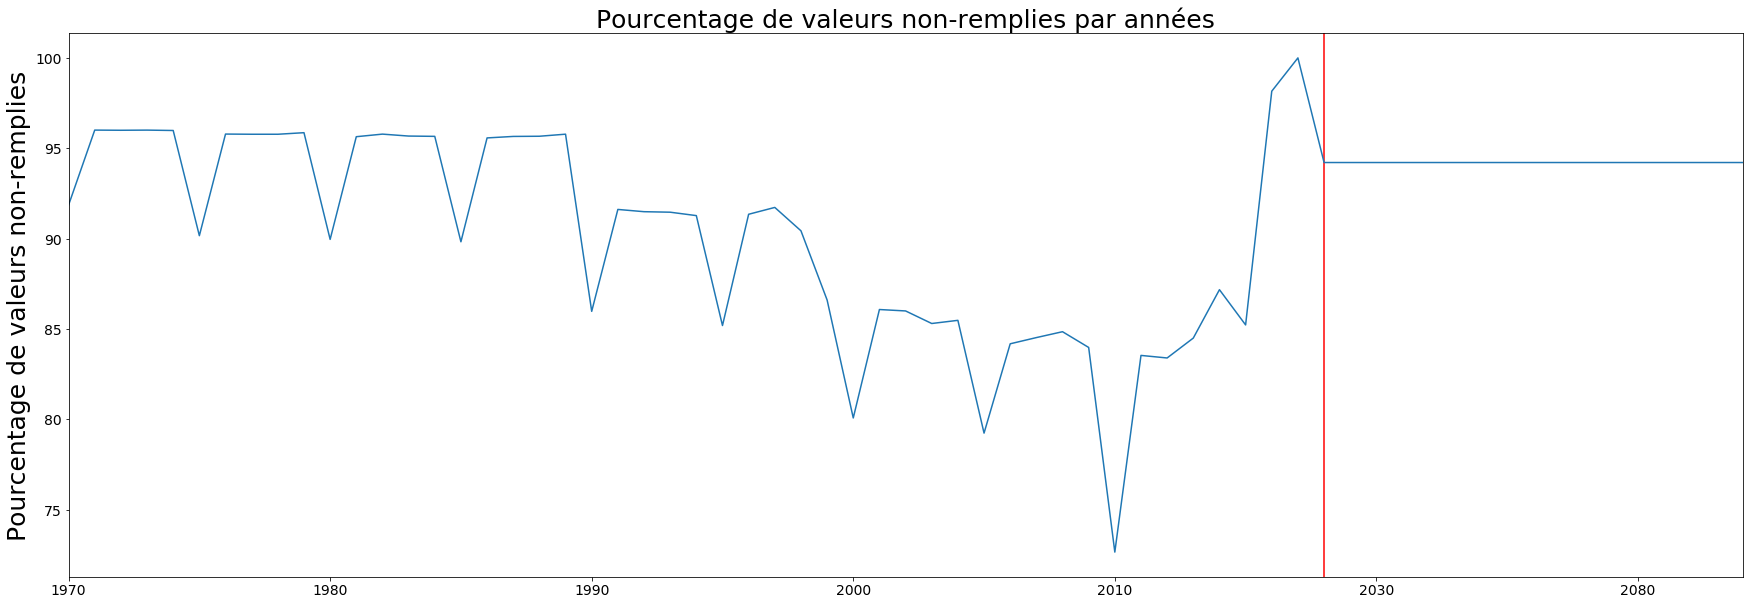

In [5]:
#Represent the amount of NaNs per year (showing year 2020 with a red vertical axis)
nan= data.isnull().sum(axis = 0)/lignes*100
nan.drop(nan.index[0:4],inplace=True)

nan

plt.figure(figsize=(30,10))
# plt.xlabel("Années",fontsize=25)
plt.ylabel("Pourcentage de valeurs non-remplies",fontsize=25)
plt.title("Pourcentage de valeurs non-remplies par années",fontsize=25)
plt.axvline(x=48,color='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
g = nan.plot()
# g=sns.barplot(x=nan.index,y=nan.values)
# plt.xticks(rotation=45)


### Heat map of non-null values per year per country 

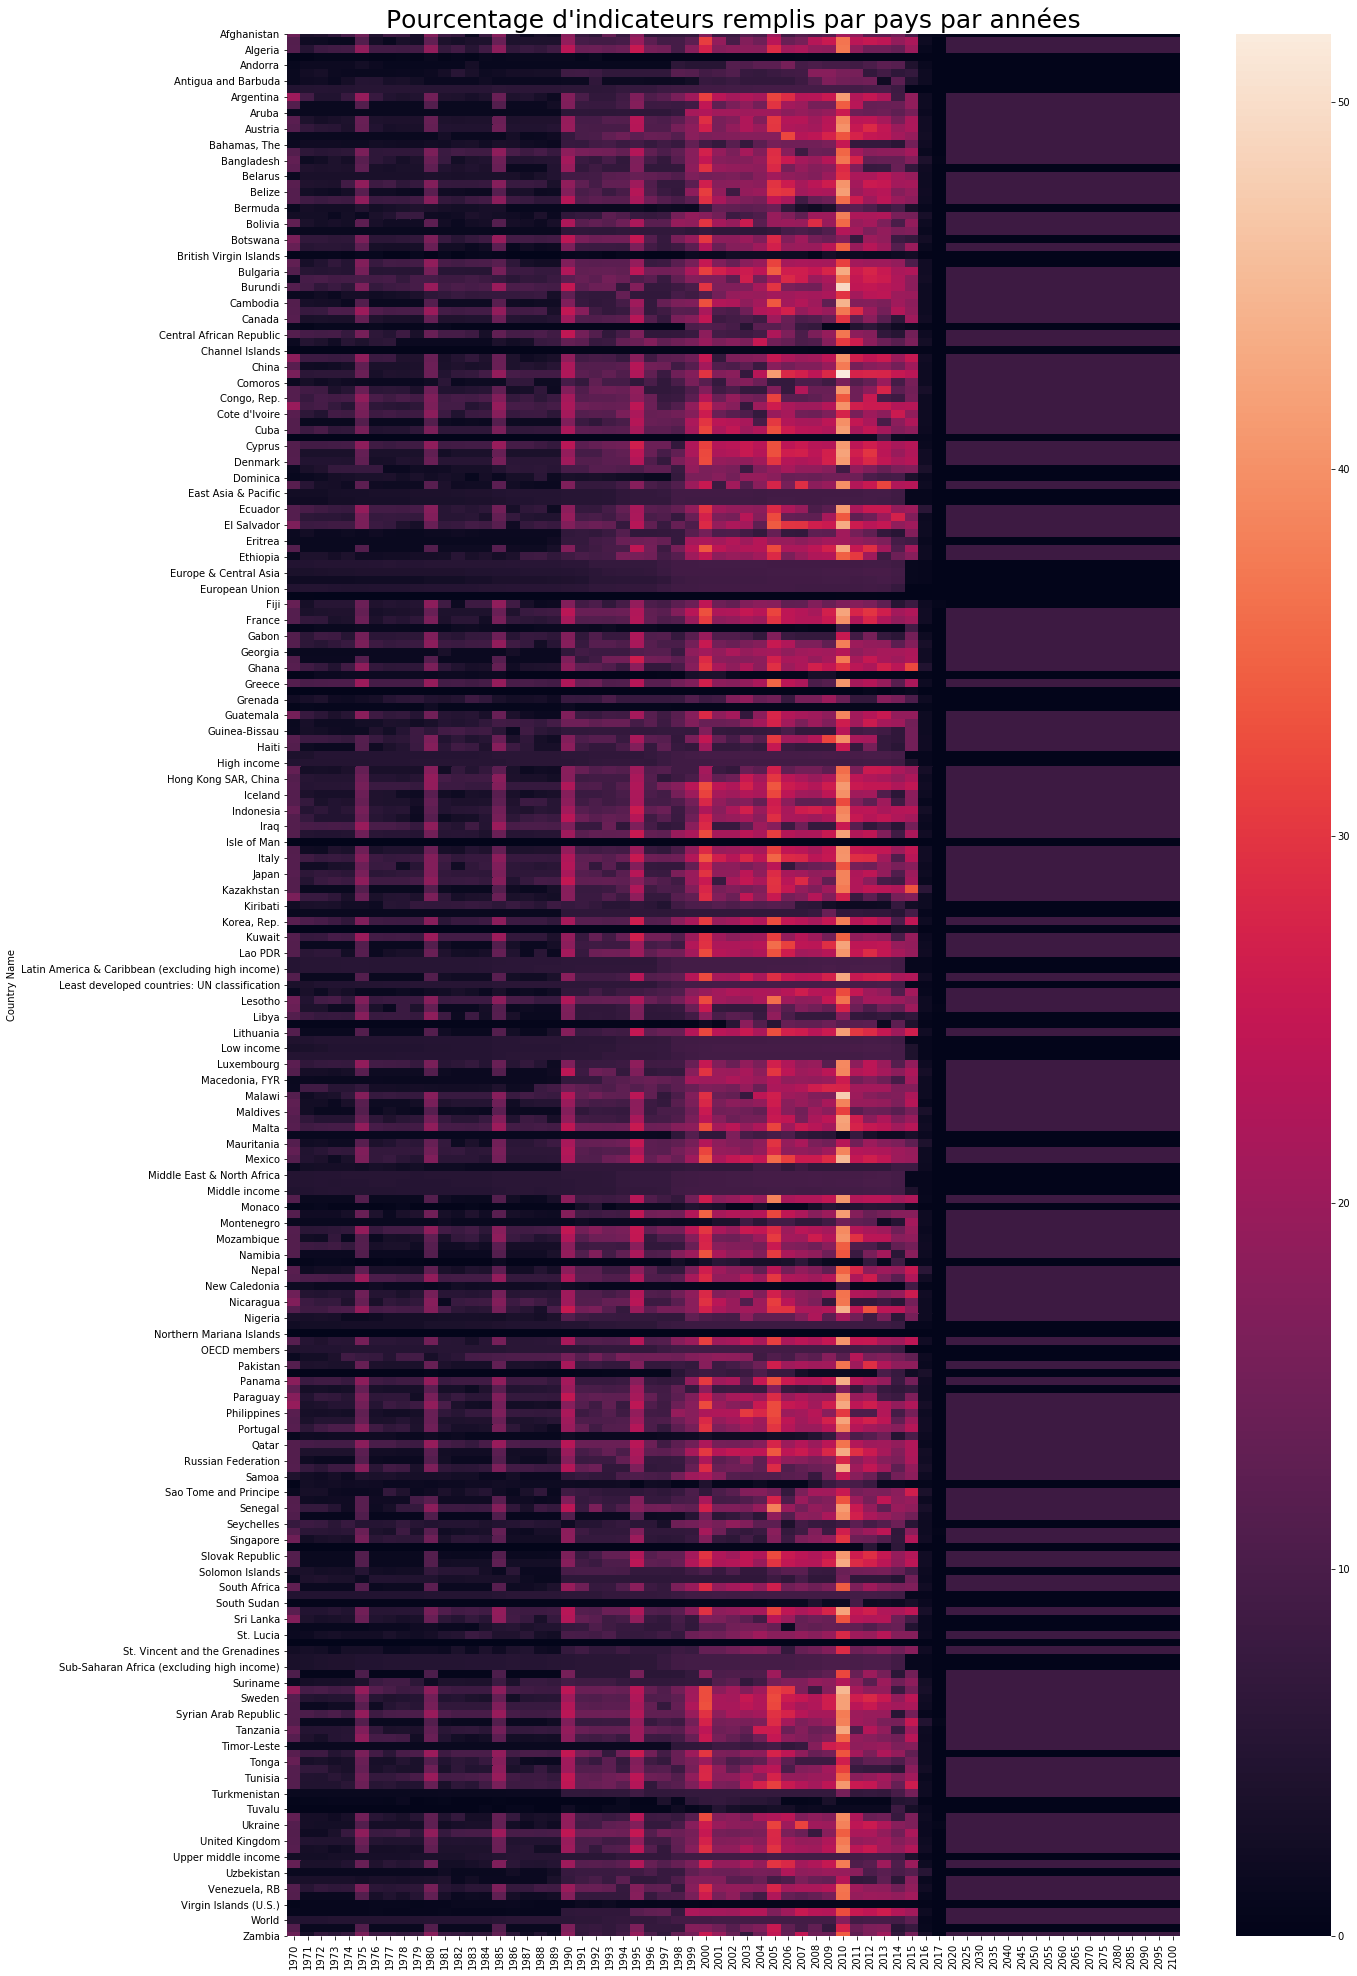

In [6]:
# 2D view of NaNs with an heat map 
data_nan = data.groupby(['Country Name']).count()/indicateurs*100
data_nan.drop(data_nan.columns[0:3],axis=1,inplace=True)
plt.figure(figsize=(20,35))

plt.title("Pourcentage d'indicateurs remplis par pays par années",fontsize=25)
heat = sns.heatmap(data_nan)
# plt.setp(heat.get_yticklabels(), visible=False)

### Update data with chosen time range

In [7]:
#Re-index table with keeping columns from 2010 to 2015
data=data.reindex(columns=['Country Name','Country Code','Indicator Name','Indicator Code',
                           '2010','2011','2012','2013','2014','2015'])
data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        2010      2011       2012      2013       2014  2015  
0        NaN       NaN        NaN       NaN        NaN   NaN  
1        NaN       NaN        NaN       NaN        NaN   NaN  
2        NaN       NaN        NaN       NaN        NaN   NaN  
3        NaN       NaN        NaN       NaN        NaN   NaN  
4  85.211998  85.24514  86.101669  85.51194  85.320152   NaN

## Remove 'non-country' values from country column

In [8]:
# Split data into 2 : data for regions (such as Europe or Arab World) 
# and data for countries, using the csv country i created

list_country = country[country["Category"]==2]
list_country =list_country["Country"]
list_region = country.loc[(country["Category"]==1)]
list_region = list_region["Country"]


data_country = data[data["Country Name"].isin(list_country)]
nbCountry = len(data_country["Country Name"].unique())
data_region = data[data["Country Name"].isin(list_region)]
nbRegion = len(data_region["Country Name"].unique())

#Use only the countries for the current study 
data = data_country
print(nbCountry," pays restants")

216  pays restants


In [9]:
#list_country_data = data["Country Name"].unique()
#print(*list_country_data, sep='\n')


## Which Indicators to keep? 

### Remove obvious irrelevant indicators

In [10]:
# We do not want to study indicators with gender
# Let's drop indicators containing either "male" or "female" string

gender = ['male','female']
data= data[~data['Indicator Name'].str.contains('|'.join(gender ), na=False)]
print('Il reste: \n',len(data["Indicator Name"].unique()), 'indicateurs')

Il reste: 
 2458 indicateurs


In [11]:
test=data["Indicator Name"].unique()
for i in range(len(test)):
    print(test[i])

Adjusted net enrolment rate, lower secondary, both sexes (%)
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)
Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, gender parity index (GPI)
Adjusted net enrolment rate, upper secondary, both sexes (%)
Adjusted net enrolment rate, upper secondary, gender parity index (GPI)
Adjusted net intake rate to Grade 1 of primary education, both sexes (%)
Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)
Adult illiterate population, 15+ years, both sexes (number)
Adult literacy rate, population 15+ years, both sexes (%)
Adult literacy rate, population 15+ years, gender parity index (GPI)
Africa Dataset: Average number of grades per multigrade class in primary schools (number of grades)
Africa Dataset: Average number of pupils per mathematics textbook in Grade 1 of primary education (number)
Africa Dataset: Average number of pupils per mathematics textbook 

Official entrance age to compulsory education (years)
Official entrance age to lower secondary education (years)
Official entrance age to post-secondary non-tertiary education (years)
Official entrance age to pre-primary education (years)
Official entrance age to primary education (years)
Official entrance age to upper secondary education (years)
Outbound mobility ratio, all regions, both sexes (%)
Out-of-school adolescents of lower secondary school age, both sexes (number)
Out-of-school children of primary school age in pre-primary education, both sexes (number)
Out-of-school children of primary school age, both sexes (number)
Out-of-school youth of upper secondary school age, both sexes (number)
Over-age enrolment ratio in primary education, both sexes (%)
PASEC: 2nd grade students by language proficiency level (%). Below Level 1
PASEC: 2nd grade students by language proficiency level (%). Level 1
PASEC: 2nd grade students by language proficiency level (%). Level 2
PASEC: 2nd grade s

### Study percentage of empty cells per indicators 

In [12]:
#create a table grouped by indicator to assess the ones with insufficient level of data

study_indicators = data.groupby(['Indicator Name']).count()/nbCountry
study_indicators.drop(study_indicators.columns[0:3],axis=1,inplace=True)

study_indicators['Mean']=study_indicators.mean(axis=1)

study_indicators.head()

2010      2011  \
Indicator Name                                                           
Adjusted net enrolment rate, lower secondary, b...  0.490741  0.495370   
Adjusted net enrolment rate, lower secondary, g...  0.476852  0.490741   
Adjusted net enrolment rate, primary, both sexe...  0.606481  0.611111   
Adjusted net enrolment rate, primary, gender pa...  0.509259  0.532407   
Adjusted net enrolment rate, upper secondary, b...  0.263889  0.263889   

                                                        2012      2013  \
Indicator Name                                                           
Adjusted net enrolment rate, lower secondary, b...  0.472222  0.458333   
Adjusted net enrolment rate, lower secondary, g...  0.467593  0.453704   
Adjusted net enrolment rate, primary, both sexe...  0.629630  0.587963   
Adjusted net enrolment rate, primary, gender pa...  0.537037  0.486111   
Adjusted net enrolment rate, upper secondary, b...  0.245370  0.462963   

                                                        2014      2015  \
Indicator Name                                                           
Adjusted net enrolment rate, lower secondary, b...  0.393519  0.013889   
Adjusted net enrolment rate, lower secondary, g...  0.388889  0.013889   
Adjusted net enrolment rate, primary, both sexe...  0.601852  0.518519   
Adjusted net enrolment rate, primary, gender pa...  0.439815  0.032407   
Adjusted net enrolment rate, upper secondary, b...  0.416667  0.013889   

                                                        Mean  
Indicator Name                                                
Adjusted net enrolment rate, lower secondary, b...  0.387346  
Adjusted net enrolment rate, lower secondary, g...  0.381944  
Adjusted net enrolment rate, primary, both sexe...  0.592593  
Adjusted net enrolment rate, primary, gender pa...  0.422840  
Adjusted net enrolment rate, upper secondary, b...  0.277778

In [13]:
#Drop indicator with average filling level inferior to a given percentage (here 60%)
study_indicators = study_indicators.where(study_indicators['Mean']>0.60)
study_indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2458 entries, Adjusted net enrolment rate, lower secondary, both sexes (%) to Youth literacy rate, population 15-24 years, gender parity index (GPI)
Data columns (total 7 columns):
2010    129 non-null float64
2011    129 non-null float64
2012    129 non-null float64
2013    129 non-null float64
2014    129 non-null float64
2015    129 non-null float64
Mean    129 non-null float64
dtypes: float64(7)
memory usage: 153.6+ KB


In [14]:
study_indicators = study_indicators.dropna()

list(study_indicators.index)

['Duration of compulsory education (years)',
 'Enrolment in lower secondary general, both sexes (number)',
 'Enrolment in pre-primary education, both sexes (number)',
 'Enrolment in primary education, both sexes (number)',
 'Enrolment in secondary education, both sexes (number)',
 'Enrolment in secondary general, both sexes (number)',
 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'GDP at market prices (constant 2005 US$)',
 'GDP at market prices (current US$)',
 'GDP per capita (constant 2005 US$)',
 'GDP per capita (current US$)',
 'GDP per capita, PPP (constant 2011 international $)',
 'GDP per capita, PPP (current international $)',
 'GDP, PPP (constant 2011 international $)',
 'GDP, PPP (current international $)',
 'GNI (current US$)',
 'GNI per capita, Atlas method (current US$)',
 'GNI per capita, PPP (current international $)',
 'GNI, PPP (current international $)',
 'Gross enrolment ratio, lower secondary, both sexes (%)',
 'Gross enrolment ratio, pr

In [15]:
#Study all different indicators related to secondary school
#The purpose was to see all indicators with "secondary" word

# raw_data= raw_data[raw_data['Indicator Name'].str.contains('secondary', na=False)]

# raw_data= raw_data[~raw_data['Indicator Name'].str.contains('|'.join(gender ), na=False)]
# print('Il reste: \n',len(raw_data["Indicator Name"].unique()), 'indicateurs')

# test=raw_data["Indicator Name"].unique()
# for i in range(len(test)):
#     print(test[i])

In [16]:
#list of the chosen indicators 
relevant_indicators = ['Population, total','Internet users (per 100 people)',
                       'GDP per capita (current US$)','Gross enrolment ratio, secondary, both sexes (%)']

#keep only relevant indicators
data = data[data["Indicator Name"].isin(relevant_indicators)]
data.head()


Country Name Country Code  \
92870  Afghanistan          AFG   
92960  Afghanistan          AFG   
93000  Afghanistan          AFG   
94158  Afghanistan          AFG   
96535      Albania          ALB   

                                         Indicator Name  Indicator Code  \
92870                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                   Internet users (per 100 people)  IT.NET.USER.P2   
94158                                 Population, total     SP.POP.TOTL   
96535                      GDP per capita (current US$)  NY.GDP.PCAP.CD   

               2010          2011          2012          2013          2014  \
92870  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02   
92960  5.324683e+01  5.461618e+01  5.667734e+01  5.668866e+01  5.565616e+01   
93000  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00   
94158  2.880317e+07  2.970860e+07  3.069696e+07  3.173169e+07  3.275802e+07   
96535  4.094359e+03  4.437178e+03  4.247614e+03  4.413082e+03  4.578667e+03   

               2015  
92870  5.695779e+02  
92960  5.564441e+01  
93000  8.260000e+00  
94158  3.373649e+07  
96535  3.934895e+03

## Which Countries to keep ?

### Remove Countries with too many NaNs to be studied 

In [17]:
#Remove countries which cannot provide more than 1 input for a least one of the chosen indicators
len(data.index)

#Create a column to count each NaN per row 
data["Nans"]= 10-data.count(axis=1)
data.head()

Country Name Country Code  \
92870  Afghanistan          AFG   
92960  Afghanistan          AFG   
93000  Afghanistan          AFG   
94158  Afghanistan          AFG   
96535      Albania          ALB   

                                         Indicator Name  Indicator Code  \
92870                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                   Internet users (per 100 people)  IT.NET.USER.P2   
94158                                 Population, total     SP.POP.TOTL   
96535                      GDP per capita (current US$)  NY.GDP.PCAP.CD   

               2010          2011          2012          2013          2014  \
92870  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02   
92960  5.324683e+01  5.461618e+01  5.667734e+01  5.668866e+01  5.565616e+01   
93000  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00   
94158  2.880317e+07  2.970860e+07  3.069696e+07  3.173169e+07  3.275802e+07   
96535  4.094359e+03  4.437178e+03  4.247614e+03  4.413082e+03  4.578667e+03   

               2015  Nans  
92870  5.695779e+02     0  
92960  5.564441e+01     0  
93000  8.260000e+00     0  
94158  3.373649e+07     0  
96535  3.934895e+03     0

In [18]:
data.describe()

2010          2011          2012          2013          2014  \
count  7.640000e+02  7.700000e+02  7.570000e+02  7.490000e+02  7.420000e+02   
mean   9.012975e+06  9.049739e+06  9.310363e+06  9.523787e+06  9.713239e+06   
std    6.943071e+07  6.978600e+07  7.100050e+07  7.200007e+07  7.296782e+07   
min    2.500000e-01  7.000000e-01  8.000000e-01  9.000000e-01  9.900000e-01   
25%    6.300000e+01  6.330999e+01  6.580000e+01  6.891380e+01  7.300000e+01   
50%    1.021336e+03  1.035588e+03  1.175562e+03  1.423682e+03  1.298375e+03   
75%    1.042720e+05  1.042998e+05  1.052750e+05  1.085350e+05  1.086078e+05   
max    1.337705e+09  1.344130e+09  1.350695e+09  1.357380e+09  1.364270e+09   

               2015        Nans  
count  7.230000e+02  864.000000  
mean   1.008636e+07    0.785880  
std    7.454612e+07    1.795897  
min    1.083733e+00    0.000000  
25%    7.299935e+01    0.000000  
50%    1.504715e+03    0.000000  
75%    1.659520e+05    0.000000  
max    1.371220e+09    6.000000

In [19]:
data[data["Nans"]>4].count()

Country Name      79
Country Code      79
Indicator Name    79
Indicator Code    79
2010               3
2011               2
2012               2
2013               2
2014               1
2015               3
Nans              79
dtype: int64

In [20]:
#Create a list of countries with at least one indicator showing more than 4 NaNs 
pays_insufisants = data[data["Nans"]>4]
pays_insufisants = pays_insufisants["Country Name"].unique()
len(pays_insufisants)

57

In [21]:
data = data[~data["Country Name"].isin(pays_insufisants)]
len(data['Country Name'].unique())
data.head(50)

Country Name Country Code  \
92870           Afghanistan          AFG   
92960           Afghanistan          AFG   
93000           Afghanistan          AFG   
94158           Afghanistan          AFG   
96535               Albania          ALB   
96625               Albania          ALB   
96665               Albania          ALB   
97823               Albania          ALB   
100200              Algeria          DZA   
100290              Algeria          DZA   
100330              Algeria          DZA   
101488              Algeria          DZA   
111195               Angola          AGO   
111285               Angola          AGO   
111325               Angola          AGO   
112483               Angola          AGO   
114860  Antigua and Barbuda          ATG   
114950  Antigua and Barbuda          ATG   
114990  Antigua and Barbuda          ATG   
116148  Antigua and Barbuda          ATG   
118525            Argentina          ARG   
118615            Argentina          ARG   
118655            Argentina          ARG   
119813            Argentina          ARG   
125855                Aruba          ABW   
125945                Aruba          ABW   
125985                Aruba          ABW   
127143                Aruba          ABW   
129520            Australia          AUS   
129610            Australia          AUS   
129650            Australia          AUS   
130808            Australia          AUS   
133185              Austria          AUT   
133275              Austria          AUT   
133315              Austria          AUT   
134473              Austria          AUT   
144180              Bahrain          BHR   
144270              Bahrain          BHR   
144310              Bahrain          BHR   
145468              Bahrain          BHR   
147845           Bangladesh          BGD   
147935           Bangladesh          BGD   
147975           Bangladesh          BGD   
149133           Bangladesh          BGD   
151510             Barbados          BRB   
151600             Barbados          BRB   
151640             Barbados          BRB   
152798             Barbados          BRB   
155175              Belarus          BLR   
155265              Belarus          BLR   

                                          Indicator Name  Indicator Code  \
92870                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                    Internet users (per 100 people)  IT.NET.USER.P2   
94158                                  Population, total     SP.POP.TOTL   
96535                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
96625   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
96665                    Internet users (per 100 people)  IT.NET.USER.P2   
97823                                  Population, total     SP.POP.TOTL   
100200                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
100330                   Internet users (per 100 people)  IT.NET.USER.P2   
101488                                 Population, total     SP.POP.TOTL   
111195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111325                   Internet users (per 100 people)  IT.NET.USER.P2   
112483                                 Population, total     SP.POP.TOTL   
114860                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114990                   Internet users (per 100 people)  IT.NET.USER.P2   
116148                                 Population, total     SP.POP.TOTL   
118525                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118655                

In [22]:
data.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
2010              19
2011              14
2012              24
2013              32
2014              33
2015              53
Nans               0
dtype: int64

# Fill in remaining NaN values

## Fill in NaNs manually 

In [23]:
# Here is the manual imputation part:
# First we create a copy of original data 
# (we will do the same for the other imputation methods in order to be able to choose the one we prefer later)

data_manual = data.copy()
data_manual['Mean']=data_manual.mean(axis=1) 


data_manual.head(50)

Country Name Country Code  \
92870           Afghanistan          AFG   
92960           Afghanistan          AFG   
93000           Afghanistan          AFG   
94158           Afghanistan          AFG   
96535               Albania          ALB   
96625               Albania          ALB   
96665               Albania          ALB   
97823               Albania          ALB   
100200              Algeria          DZA   
100290              Algeria          DZA   
100330              Algeria          DZA   
101488              Algeria          DZA   
111195               Angola          AGO   
111285               Angola          AGO   
111325               Angola          AGO   
112483               Angola          AGO   
114860  Antigua and Barbuda          ATG   
114950  Antigua and Barbuda          ATG   
114990  Antigua and Barbuda          ATG   
116148  Antigua and Barbuda          ATG   
118525            Argentina          ARG   
118615            Argentina          ARG   
118655            Argentina          ARG   
119813            Argentina          ARG   
125855                Aruba          ABW   
125945                Aruba          ABW   
125985                Aruba          ABW   
127143                Aruba          ABW   
129520            Australia          AUS   
129610            Australia          AUS   
129650            Australia          AUS   
130808            Australia          AUS   
133185              Austria          AUT   
133275              Austria          AUT   
133315              Austria          AUT   
134473              Austria          AUT   
144180              Bahrain          BHR   
144270              Bahrain          BHR   
144310              Bahrain          BHR   
145468              Bahrain          BHR   
147845           Bangladesh          BGD   
147935           Bangladesh          BGD   
147975           Bangladesh          BGD   
149133           Bangladesh          BGD   
151510             Barbados          BRB   
151600             Barbados          BRB   
151640             Barbados          BRB   
152798             Barbados          BRB   
155175              Belarus          BLR   
155265              Belarus          BLR   

                                          Indicator Name  Indicator Code  \
92870                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                    Internet users (per 100 people)  IT.NET.USER.P2   
94158                                  Population, total     SP.POP.TOTL   
96535                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
96625   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
96665                    Internet users (per 100 people)  IT.NET.USER.P2   
97823                                  Population, total     SP.POP.TOTL   
100200                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
100330                   Internet users (per 100 people)  IT.NET.USER.P2   
101488                                 Population, total     SP.POP.TOTL   
111195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111325                   Internet users (per 100 people)  IT.NET.USER.P2   
112483                                 Population, total     SP.POP.TOTL   
114860                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114990                   Internet users (per 100 people)  IT.NET.USER.P2   
116148                                 Population, total     SP.POP.TOTL   
118525                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118655                

In [24]:
#The pattern here is quite simple:

#First we create 2 loops to go through the table first vertically then horizontally 
for ind in range(0,len(data_manual.index)): 
    for j in range(4,10): 
# We need to find each NaN, do it with an IF statement: 
        if np.isnan(data_manual.iat[ind,j]):

# Two cases here:
# 1) if the NaN is found in 2010 column (i.e. the first column)
            if (j == 4):
# We need to find the next non-empty cell in this row 
                for k in range (5,10):
                    if ~(np.isnan(data_manual.iat[ind,k])):
                        data_manual.iat[ind,j] = data_manual.iat[ind,k]
                        break
# 2) if it is another column, then we take the previous cell value
#    As we go through the table from left to right, the previous cell cannot be empty
            else: 
                data_manual.iat[ind,j] = data_manual.iat[ind,j-1]

data_manual.head(40)

Country Name Country Code  \
92870           Afghanistan          AFG   
92960           Afghanistan          AFG   
93000           Afghanistan          AFG   
94158           Afghanistan          AFG   
96535               Albania          ALB   
96625               Albania          ALB   
96665               Albania          ALB   
97823               Albania          ALB   
100200              Algeria          DZA   
100290              Algeria          DZA   
100330              Algeria          DZA   
101488              Algeria          DZA   
111195               Angola          AGO   
111285               Angola          AGO   
111325               Angola          AGO   
112483               Angola          AGO   
114860  Antigua and Barbuda          ATG   
114950  Antigua and Barbuda          ATG   
114990  Antigua and Barbuda          ATG   
116148  Antigua and Barbuda          ATG   
118525            Argentina          ARG   
118615            Argentina          ARG   
118655            Argentina          ARG   
119813            Argentina          ARG   
125855                Aruba          ABW   
125945                Aruba          ABW   
125985                Aruba          ABW   
127143                Aruba          ABW   
129520            Australia          AUS   
129610            Australia          AUS   
129650            Australia          AUS   
130808            Australia          AUS   
133185              Austria          AUT   
133275              Austria          AUT   
133315              Austria          AUT   
134473              Austria          AUT   
144180              Bahrain          BHR   
144270              Bahrain          BHR   
144310              Bahrain          BHR   
145468              Bahrain          BHR   

                                          Indicator Name  Indicator Code  \
92870                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                    Internet users (per 100 people)  IT.NET.USER.P2   
94158                                  Population, total     SP.POP.TOTL   
96535                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
96625   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
96665                    Internet users (per 100 people)  IT.NET.USER.P2   
97823                                  Population, total     SP.POP.TOTL   
100200                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
100330                   Internet users (per 100 people)  IT.NET.USER.P2   
101488                                 Population, total     SP.POP.TOTL   
111195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111325                   Internet users (per 100 people)  IT.NET.USER.P2   
112483                                 Population, total     SP.POP.TOTL   
114860                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114990                   Internet users (per 100 people)  IT.NET.USER.P2   
116148                                 Population, total     SP.POP.TOTL   
118525                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118655                   Internet users (per 100 people)  IT.NET.USER.P2   
119813                                 Population, total     SP.POP.TOTL   
125855                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
125945  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
125985                   Internet users (per 100 people)  IT.NET.USER.P2   
127143                                 Population, total     SP.POP.TOTL   
129520

In [25]:
data_manual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 92870 to 885798
Data columns (total 12 columns):
Country Name      636 non-null object
Country Code      636 non-null object
Indicator Name    636 non-null object
Indicator Code    636 non-null object
2010              636 non-null float64
2011              636 non-null float64
2012              636 non-null float64
2013              636 non-null float64
2014              636 non-null float64
2015              636 non-null float64
Nans              636 non-null int64
Mean              636 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 64.6+ KB


In [26]:
data_manual.loc[100290,'2015']


99.8601913452148

In [27]:
data.head(50)

Country Name Country Code  \
92870           Afghanistan          AFG   
92960           Afghanistan          AFG   
93000           Afghanistan          AFG   
94158           Afghanistan          AFG   
96535               Albania          ALB   
96625               Albania          ALB   
96665               Albania          ALB   
97823               Albania          ALB   
100200              Algeria          DZA   
100290              Algeria          DZA   
100330              Algeria          DZA   
101488              Algeria          DZA   
111195               Angola          AGO   
111285               Angola          AGO   
111325               Angola          AGO   
112483               Angola          AGO   
114860  Antigua and Barbuda          ATG   
114950  Antigua and Barbuda          ATG   
114990  Antigua and Barbuda          ATG   
116148  Antigua and Barbuda          ATG   
118525            Argentina          ARG   
118615            Argentina          ARG   
118655            Argentina          ARG   
119813            Argentina          ARG   
125855                Aruba          ABW   
125945                Aruba          ABW   
125985                Aruba          ABW   
127143                Aruba          ABW   
129520            Australia          AUS   
129610            Australia          AUS   
129650            Australia          AUS   
130808            Australia          AUS   
133185              Austria          AUT   
133275              Austria          AUT   
133315              Austria          AUT   
134473              Austria          AUT   
144180              Bahrain          BHR   
144270              Bahrain          BHR   
144310              Bahrain          BHR   
145468              Bahrain          BHR   
147845           Bangladesh          BGD   
147935           Bangladesh          BGD   
147975           Bangladesh          BGD   
149133           Bangladesh          BGD   
151510             Barbados          BRB   
151600             Barbados          BRB   
151640             Barbados          BRB   
152798             Barbados          BRB   
155175              Belarus          BLR   
155265              Belarus          BLR   

                                          Indicator Name  Indicator Code  \
92870                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                    Internet users (per 100 people)  IT.NET.USER.P2   
94158                                  Population, total     SP.POP.TOTL   
96535                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
96625   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
96665                    Internet users (per 100 people)  IT.NET.USER.P2   
97823                                  Population, total     SP.POP.TOTL   
100200                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
100330                   Internet users (per 100 people)  IT.NET.USER.P2   
101488                                 Population, total     SP.POP.TOTL   
111195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111325                   Internet users (per 100 people)  IT.NET.USER.P2   
112483                                 Population, total     SP.POP.TOTL   
114860                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114990                   Internet users (per 100 people)  IT.NET.USER.P2   
116148                                 Population, total     SP.POP.TOTL   
118525                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118655                

## Fill in NaN using polynomial interpolation

In [28]:
#Second option is to use polynomial interpolation to fill in the NaNs

data_interpolate = data.copy()
# data_interpolate.drop(columns=['Mean'],inplace=True)
data_interpolate.head(50)

Country Name Country Code  \
92870           Afghanistan          AFG   
92960           Afghanistan          AFG   
93000           Afghanistan          AFG   
94158           Afghanistan          AFG   
96535               Albania          ALB   
96625               Albania          ALB   
96665               Albania          ALB   
97823               Albania          ALB   
100200              Algeria          DZA   
100290              Algeria          DZA   
100330              Algeria          DZA   
101488              Algeria          DZA   
111195               Angola          AGO   
111285               Angola          AGO   
111325               Angola          AGO   
112483               Angola          AGO   
114860  Antigua and Barbuda          ATG   
114950  Antigua and Barbuda          ATG   
114990  Antigua and Barbuda          ATG   
116148  Antigua and Barbuda          ATG   
118525            Argentina          ARG   
118615            Argentina          ARG   
118655            Argentina          ARG   
119813            Argentina          ARG   
125855                Aruba          ABW   
125945                Aruba          ABW   
125985                Aruba          ABW   
127143                Aruba          ABW   
129520            Australia          AUS   
129610            Australia          AUS   
129650            Australia          AUS   
130808            Australia          AUS   
133185              Austria          AUT   
133275              Austria          AUT   
133315              Austria          AUT   
134473              Austria          AUT   
144180              Bahrain          BHR   
144270              Bahrain          BHR   
144310              Bahrain          BHR   
145468              Bahrain          BHR   
147845           Bangladesh          BGD   
147935           Bangladesh          BGD   
147975           Bangladesh          BGD   
149133           Bangladesh          BGD   
151510             Barbados          BRB   
151600             Barbados          BRB   
151640             Barbados          BRB   
152798             Barbados          BRB   
155175              Belarus          BLR   
155265              Belarus          BLR   

                                          Indicator Name  Indicator Code  \
92870                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                    Internet users (per 100 people)  IT.NET.USER.P2   
94158                                  Population, total     SP.POP.TOTL   
96535                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
96625   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
96665                    Internet users (per 100 people)  IT.NET.USER.P2   
97823                                  Population, total     SP.POP.TOTL   
100200                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
100330                   Internet users (per 100 people)  IT.NET.USER.P2   
101488                                 Population, total     SP.POP.TOTL   
111195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111325                   Internet users (per 100 people)  IT.NET.USER.P2   
112483                                 Population, total     SP.POP.TOTL   
114860                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114990                   Internet users (per 100 people)  IT.NET.USER.P2   
116148                                 Population, total     SP.POP.TOTL   
118525                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118655                

In [29]:
# two interpolation methods have been tried : 
# Lagrange interpolation and 3rd degree polynomial interpolation
# (i also kept the first attempt with a linear regression which was use to validate the function construction)

def prediction(row): 
    
    global data_interpolate 

#  the "prediction" function is used on a row
# first we need to feed the interpolation with all the non-empty cells: 

# we create a list of all years with a non-empty out
    x = [year for year in range(2010,2016) if not np.isnan(row.loc[str(year)])]
    
# then we take all the outputs as y values
    y = [row.loc[str(year)] for year in range(2010,2016) if not np.isnan(row.loc[str(year)])]
    
# and then we feed the chosen function (either linear interpolation or lagrange or 3rd degree polynomial) 
# with our x and y values
    
#     f = interpolate.interp1d(x,y,bounds_error =False,fill_value ="extrapolate")
    f = interpolate.lagrange(x,y)
#     coefs = np.polyfit(x,y,3)
    
    
# now that the interpolation is done, we can use it to fill in all the NaN values of the row
    for year in range(2010,2016):
        if np.isnan(row.loc[str(year)]):
#             print('Row:',row.name,'Nan trouvé :',row)
            data_interpolate.loc[row.name,str(year)]=f(year)
#             data_interpolate.loc[row.name,str(year)]=np.polyval(coefs,year)
    




In [30]:
# Here we call the "prediction" function (which is defined in the previous section)
# It will be used on each row of the dataframe thanks to the "apply" function
data_interpolate.apply(prediction,axis=1)
data_interpolate.head(50)

#------------------------------------------
# Output of the polynomials interpolations
#------------------------------------------

# Both the lagrange and 3rd degree polynomial interpolation gave unsatisfying results
# Lagrange showed some unstability (UK gross enrolment secondary school in 2015: -53%)
# 3rd Degree was not really accurate ( Aruba's gross enrolmnent in 2015: 230%)
# Everything discribed in the presentation powerpoint



Country Name Country Code  \
92870           Afghanistan          AFG   
92960           Afghanistan          AFG   
93000           Afghanistan          AFG   
94158           Afghanistan          AFG   
96535               Albania          ALB   
96625               Albania          ALB   
96665               Albania          ALB   
97823               Albania          ALB   
100200              Algeria          DZA   
100290              Algeria          DZA   
100330              Algeria          DZA   
101488              Algeria          DZA   
111195               Angola          AGO   
111285               Angola          AGO   
111325               Angola          AGO   
112483               Angola          AGO   
114860  Antigua and Barbuda          ATG   
114950  Antigua and Barbuda          ATG   
114990  Antigua and Barbuda          ATG   
116148  Antigua and Barbuda          ATG   
118525            Argentina          ARG   
118615            Argentina          ARG   
118655            Argentina          ARG   
119813            Argentina          ARG   
125855                Aruba          ABW   
125945                Aruba          ABW   
125985                Aruba          ABW   
127143                Aruba          ABW   
129520            Australia          AUS   
129610            Australia          AUS   
129650            Australia          AUS   
130808            Australia          AUS   
133185              Austria          AUT   
133275              Austria          AUT   
133315              Austria          AUT   
134473              Austria          AUT   
144180              Bahrain          BHR   
144270              Bahrain          BHR   
144310              Bahrain          BHR   
145468              Bahrain          BHR   
147845           Bangladesh          BGD   
147935           Bangladesh          BGD   
147975           Bangladesh          BGD   
149133           Bangladesh          BGD   
151510             Barbados          BRB   
151600             Barbados          BRB   
151640             Barbados          BRB   
152798             Barbados          BRB   
155175              Belarus          BLR   
155265              Belarus          BLR   

                                          Indicator Name  Indicator Code  \
92870                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                    Internet users (per 100 people)  IT.NET.USER.P2   
94158                                  Population, total     SP.POP.TOTL   
96535                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
96625   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
96665                    Internet users (per 100 people)  IT.NET.USER.P2   
97823                                  Population, total     SP.POP.TOTL   
100200                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
100330                   Internet users (per 100 people)  IT.NET.USER.P2   
101488                                 Population, total     SP.POP.TOTL   
111195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111325                   Internet users (per 100 people)  IT.NET.USER.P2   
112483                                 Population, total     SP.POP.TOTL   
114860                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114990                   Internet users (per 100 people)  IT.NET.USER.P2   
116148                                 Population, total     SP.POP.TOTL   
118525                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118655                

In [31]:
data_interpolate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 92870 to 885798
Data columns (total 11 columns):
Country Name      636 non-null object
Country Code      636 non-null object
Indicator Name    636 non-null object
Indicator Code    636 non-null object
2010              636 non-null float64
2011              636 non-null float64
2012              636 non-null float64
2013              636 non-null float64
2014              636 non-null float64
2015              636 non-null float64
Nans              636 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 79.6+ KB


In [32]:
data[data['Nans']>0].head(50)

Country Name Country Code  \
100290                   Algeria          DZA   
111285                    Angola          AGO   
114950       Antigua and Barbuda          ATG   
118615                 Argentina          ARG   
125855                     Aruba          ABW   
125945                     Aruba          ABW   
129610                 Australia          AUS   
147935                Bangladesh          BGD   
151600                  Barbados          BRB   
166260                     Benin          BEN   
169835                   Bermuda          BMU   
173590                    Bhutan          BTN   
188250                    Brazil          BRA   
217570                  Cameroon          CMR   
221235                    Canada          CAN   
228565  Central African Republic          CAF   
232230                      Chad          TCD   
250555                   Comoros          COM   
254220          Congo, Dem. Rep.          COD   
265215             Cote d'Ivoire          CIV   
290870                  Djibouti          DJI   
294535                  Dominica          DMA   
305530          Egypt, Arab Rep.          EGY   
316435                   Eritrea          ERI   
317723                   Eritrea          ERI   
323855                  Ethiopia          ETH   
331185                      Fiji          FJI   
338515                    France          FRA   
353175                   Georgia          GEO   
360505                     Ghana          GHA   
367835                    Greece          GRC   
375165                   Grenada          GRD   
386160                    Guinea          GIN   
393490                    Guyana          GUY   
411815                   Iceland          ISL   
430140                   Ireland          IRL   
444800                   Jamaica          JAM   
448465                     Japan          JPN   
452130                    Jordan          JOR   
499775                   Liberia          LBR   
507105             Liechtenstein          LIE   
514435                Luxembourg          LUX   
521765            Macedonia, FYR          MKD   
525430                Madagascar          MDG   
540090                      Mali          MLI   
558415                    Mexico          MEX   
573075                  Mongolia          MNG   
576740                Montenegro          MNE   
580405                   Morocco          MAR   
587735                   Myanmar          MMR   

                                          Indicator Name  Indicator Code  \
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
125855                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
125945  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
129610  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
147935  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
151600  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
166260  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
169835                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
173590  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
188250  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
217570  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
221235  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
228565  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
232230  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
250555  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
254220  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   


In [33]:
data_interpolate[data_interpolate['Nans']>0].head(50)

Country Name Country Code  \
100290                   Algeria          DZA   
111285                    Angola          AGO   
114950       Antigua and Barbuda          ATG   
118615                 Argentina          ARG   
125855                     Aruba          ABW   
125945                     Aruba          ABW   
129610                 Australia          AUS   
147935                Bangladesh          BGD   
151600                  Barbados          BRB   
166260                     Benin          BEN   
169835                   Bermuda          BMU   
173590                    Bhutan          BTN   
188250                    Brazil          BRA   
217570                  Cameroon          CMR   
221235                    Canada          CAN   
228565  Central African Republic          CAF   
232230                      Chad          TCD   
250555                   Comoros          COM   
254220          Congo, Dem. Rep.          COD   
265215             Cote d'Ivoire          CIV   
290870                  Djibouti          DJI   
294535                  Dominica          DMA   
305530          Egypt, Arab Rep.          EGY   
316435                   Eritrea          ERI   
317723                   Eritrea          ERI   
323855                  Ethiopia          ETH   
331185                      Fiji          FJI   
338515                    France          FRA   
353175                   Georgia          GEO   
360505                     Ghana          GHA   
367835                    Greece          GRC   
375165                   Grenada          GRD   
386160                    Guinea          GIN   
393490                    Guyana          GUY   
411815                   Iceland          ISL   
430140                   Ireland          IRL   
444800                   Jamaica          JAM   
448465                     Japan          JPN   
452130                    Jordan          JOR   
499775                   Liberia          LBR   
507105             Liechtenstein          LIE   
514435                Luxembourg          LUX   
521765            Macedonia, FYR          MKD   
525430                Madagascar          MDG   
540090                      Mali          MLI   
558415                    Mexico          MEX   
573075                  Mongolia          MNG   
576740                Montenegro          MNE   
580405                   Morocco          MAR   
587735                   Myanmar          MMR   

                                          Indicator Name  Indicator Code  \
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
125855                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
125945  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
129610  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
147935  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
151600  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
166260  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
169835                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
173590  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
188250  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
217570  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
221235  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
228565  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
232230  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
250555  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
254220  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   


In [34]:
data_interpolate[data_interpolate['Country Name']=='United Kingdom']

Country Name Country Code  \
844195  United Kingdom          GBR   
844285  United Kingdom          GBR   
844325  United Kingdom          GBR   
845483  United Kingdom          GBR   

                                          Indicator Name  Indicator Code  \
844195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
844285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
844325                   Internet users (per 100 people)  IT.NET.USER.P2   
845483                                 Population, total     SP.POP.TOTL   

                2010          2011          2012          2013          2014  \
844195  3.889302e+04  4.141235e+04  4.179078e+04  4.272407e+04  4.678347e+04   
844285  1.019089e+02  9.284833e+01  9.139314e+01  1.244260e+02  1.278113e+02   
844325  8.500000e+01  8.538000e+01  8.748000e+01  8.984410e+01  9.161000e+01   
845483  6.276636e+07  6.325892e+07  6.370030e+07  6.412823e+07  6.461316e+07   

                2015  Nans  
844195  4.430555e+04     0  
844285 -5.371875e+01     1  
844325  9.200030e+01     0  
845483  6.512886e+07     0

In [35]:
data[data['Country Name']=='United Kingdom']

Country Name Country Code  \
844195  United Kingdom          GBR   
844285  United Kingdom          GBR   
844325  United Kingdom          GBR   
845483  United Kingdom          GBR   

                                          Indicator Name  Indicator Code  \
844195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
844285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
844325                   Internet users (per 100 people)  IT.NET.USER.P2   
845483                                 Population, total     SP.POP.TOTL   

                2010          2011          2012          2013          2014  \
844195  3.889302e+04  4.141235e+04  4.179078e+04  4.272407e+04  4.678347e+04   
844285  1.019089e+02  9.284833e+01  9.139314e+01  1.244260e+02  1.278113e+02   
844325  8.500000e+01  8.538000e+01  8.748000e+01  8.984410e+01  9.161000e+01   
845483  6.276636e+07  6.325892e+07  6.370030e+07  6.412823e+07  6.461316e+07   

                2015  Nans  
844195  4.430555e+04     0  
844285           NaN     1  
844325  9.200030e+01     0  
845483  6.512886e+07     0

# Data Analysis

In [36]:
# As the polynomial interpolation was not satisfying, we will use the manual imputation results here

data_manual.drop(columns=['Nans'],inplace=True)


In [37]:
#My goal here is to associate a grade to each indicator
#First i need to evaluate the range of possible values for each indicator to create a scale for each grade

for ind in range(0,len(relevant_indicators)):
    print(relevant_indicators[ind],": \n",
          data_manual[data_manual['Indicator Name'] == relevant_indicators[ind]].describe()," \n---------- \n")
    


Population, total : 
                2010          2011          2012          2013          2014  \
count  1.590000e+02  1.590000e+02  1.590000e+02  1.590000e+02  1.590000e+02   
mean   4.047200e+07  4.093318e+07  4.140979e+07  4.189304e+07  4.238027e+07   
std    1.479394e+08  1.492438e+08  1.505427e+08  1.518345e+08  1.531323e+08   
min    1.053100e+04  1.062800e+04  1.072500e+04  1.081900e+04  1.090800e+04   
25%    2.059661e+06  2.061938e+06  2.081982e+06  2.096550e+06  2.111640e+06   
50%    8.194778e+06  8.351600e+06  8.429991e+06  8.479375e+06  8.809216e+06   
75%    2.722441e+07  2.778258e+07  2.836814e+07  2.884602e+07  2.927563e+07   
max    1.337705e+09  1.344130e+09  1.350695e+09  1.357380e+09  1.364270e+09   

               2015          Mean  
count  1.590000e+02  1.590000e+02  
mean   4.286661e+07  3.570238e+07  
std    1.544299e+08  1.295862e+08  
min    1.100100e+04  9.230286e+03  
25%    2.126976e+06  1.791581e+06  
50%    8.960829e+06  7.262737e+06  
75%    2.96897

In [38]:
# with this first overview, i can see 2 main issues: 
# 1) secondary school enrolment (which is a percentage) can exceed 100%
# 2) Both GDP and population have a really wide range :
#    -population from 1e+04 to 1e+09
#    -GDP from $300 to $168000
# we need to find a solution here, first option is to look at quantiles, 
# and see if one or two outliers can be found 

for ind in range(0,len(relevant_indicators)):
    print('Quantiles:',relevant_indicators[ind],": \n",
          data_manual[data_manual['Indicator Name'] == relevant_indicators[ind]].quantile([0.05,0.25,0.75,0.98],axis=0)," \n---------- \n")

Quantiles: Population, total : 
               2010          2011          2012          2013          2014  \
0.05  1.038902e+05  1.043246e+05  1.047136e+05  1.051139e+05  1.055833e+05   
0.25  2.059661e+06  2.061938e+06  2.081982e+06  2.096550e+06  2.111640e+06   
0.75  2.722441e+07  2.778258e+07  2.836814e+07  2.884602e+07  2.927563e+07   
0.98  2.352077e+08  2.381842e+08  2.411517e+08  2.440925e+08  2.469842e+08   

             2015          Mean  
0.05     106161.7  8.996961e+04  
0.25    2126976.5  1.791581e+06  
0.75   29689718.5  2.453863e+07  
0.98  249810112.2  2.079186e+08    
---------- 

Quantiles: Internet users (per 100 people) : 
          2010       2011       2012       2013     2014       2015       Mean
0.05   1.6300   1.900000   2.780000   3.490000   5.7880   6.300366   3.108665
0.25  10.3500  12.290000  14.515000  15.750000  21.0000  24.750000  13.643425
0.75  56.4250  61.474999  64.900000  68.211450  71.0550  73.254350  55.485316
0.98  90.5208  91.197574  92.763

{'whiskers': [<matplotlib.lines.Line2D at 0x16d26c5a6c8>,
 'caps': [<matplotlib.lines.Line2D at 0x16d26c5ae48>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d26c53e08>],
 'medians': [<matplotlib.lines.Line2D at 0x16d26c5ffc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d26c5ff48>],
 'means': []}

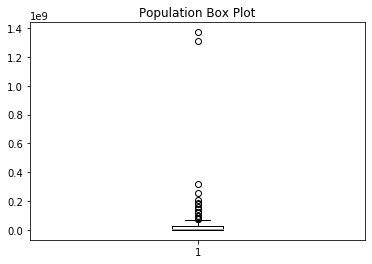

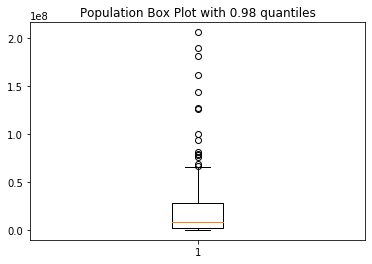

In [39]:
# Test to represent population with boxplot to show the outliers
# and how they influence the global scale of the indicator

population_box =  data_manual[data_manual['Indicator Name'] == relevant_indicators[0]]
population_box2 = population_box[population_box['2015']<250000000]

fig1, ax1 = plt.subplots()
ax1.set_title('Population Box Plot')
ax1.boxplot(population_box['2015'])

fig1, ax2 = plt.subplots()
ax2.set_title('Population Box Plot with 0.98 quantiles')
ax2.boxplot(population_box2['2015'])


159
151


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D26C9CA88>]],
      dtype=object)

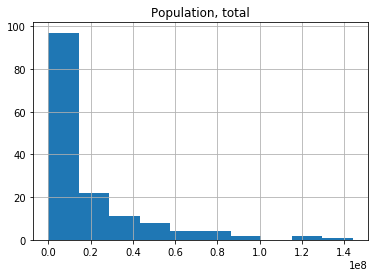

In [40]:
# Here we can already see that outliers have been found 
# (with 0.98 quantile, the max values have decreased drastically )

# The scale is still to wide to be able to properly grade the countries
# Another option would be to observ the shape of the repartition of the countries
# in order to find out a pattern to represent it better

# Represent repartition of the amount of inhabitants per countries (without the "Big" outliers)
view_pop = data_manual[data_manual['Indicator Name']=='Population, total']
print(len(view_pop))
view_pop = view_pop.loc[~(view_pop['2015']>= 150000000)]
print(len(view_pop))
view_pop = view_pop.pivot_table('2015',index='Country Name',columns='Indicator Name',aggfunc='sum')
view_pop.hist()

# high_pop = data_manual[data_manual['Indicator Name']=='Population, total']
# high_pop = high_pop.loc[high_pop['2015']>= 100000000]
# high_pop.head(15)

159
153


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D26D35148>]],
      dtype=object)

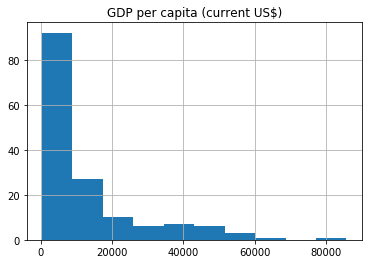

In [41]:
#  Also representing repartition of countries GDP without big outliers

view_gdp = data_manual[data_manual['Indicator Name']=='GDP per capita (current US$)']
print(len(view_gdp))
view_gdp = view_gdp.loc[~(data['2015']>= 65000)]
print(len(view_gdp))
view_gdp = view_gdp.pivot_table('2015',index='Country Name',columns='Indicator Name',aggfunc='sum')
view_gdp.hist()



In [42]:
# Here we can see that both the GDP and the Population could be represented 
# using a logarithmic scale (looking at their shape)

# Now we need to decide which grade to give to each indicator:
# My Opinion here is to have a higher grade for population than the 3 others
# This will help to lower the final rank of countries such as Luxembourg or Liechtenstein 
# (Which are extremmely wealthy but have a very small population=> very small amount of possible customer)

notation = pd.DataFrame({'Note':[8,4,4,4]},index=relevant_indicators)
notation

Note
Population, total                                    8
Internet users (per 100 people)                      4
GDP per capita (current US$)                         4
Gross enrolment ratio, secondary, both sexes (%)     4

In [43]:
# Here i built a table to help with the grades and the logarithmic scale 
# For example, i chose to evaluate the population on a logarithm based on the 0.98 quantile
# It means that a country with 249Million inhabitants or more will obtain the maximum grade
# A country with 1Million or less will obtain 0 
# A country such a France with 67Million will obtain 76% of the maximum grade 
# instead of 27% if the scale was linear 



# First step here is to populate the notation table to help with the grade calculation later : 


pop_max= data_manual[data_manual['Indicator Name']==relevant_indicators[0]].quantile(0.98).max()/1000000
gdp_max= data_manual[data_manual['Indicator Name']==relevant_indicators[2]].quantile(0.98).max()/1000

# The 'maxi' columns represents the scale maximum.
# For the Population and GDP which will be on a logarithmic scale
# it represents the logarithm base.
# so that a country with 249,81 will get the maximal grade: 
# logbase249(249) * Note = 1 * 8 = 8

notation['maxi']=[pop_max,100,gdp_max,100]

# indtype will help us to split the script into 2 cases: 
# 1) Indicator in percentage
# 2) Indicator with logarithmic scale


notation['indType']=[1,2,1,2]

# The divider will be the minimum value of a scale 
# This way with a divider of 1 000 000 for population 
# a country with 1 million inhabitant will have 0 grade
# as log(1) = 0 

notation['divider']=[1000000,0,1000,0]
notation

Note        maxi  indType  \
Population, total                                    8  249.810112        1   
Internet users (per 100 people)                      4  100.000000        2   
GDP per capita (current US$)                         4   92.860121        1   
Gross enrolment ratio, secondary, both sexes (%)     4  100.000000        2   

                                                  divider  
Population, total                                 1000000  
Internet users (per 100 people)                         0  
GDP per capita (current US$)                         1000  
Gross enrolment ratio, secondary, both sexes (%)        0

In [44]:
# Create 6 new columns (so as to store the grade of each year)
data_manual = data_manual.reindex(data_manual.columns.tolist() + 
                                  ['2010 Grade','2011 Grade','2012 Grade','2013 Grade','2014 Grade','2015 Grade'], axis=1)
data_manual.head()

Country Name Country Code  \
92870  Afghanistan          AFG   
92960  Afghanistan          AFG   
93000  Afghanistan          AFG   
94158  Afghanistan          AFG   
96535      Albania          ALB   

                                         Indicator Name  Indicator Code  \
92870                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                   Internet users (per 100 people)  IT.NET.USER.P2   
94158                                 Population, total     SP.POP.TOTL   
96535                      GDP per capita (current US$)  NY.GDP.PCAP.CD   

               2010          2011          2012          2013          2014  \
92870  5.533003e+02  6.035370e+02  6.690091e+02  6.317450e+02  6.120697e+02   
92960  5.324683e+01  5.461618e+01  5.667734e+01  5.668866e+01  5.565616e+01   
93000  4.000000e+00  5.000000e+00  5.454545e+00  5.900000e+00  7.000000e+00   
94158  2.880317e+07  2.970860e+07  3.069696e+07  3.173169e+07  3.275802e+07   
96535  4.094359e+03  4.437178e+03  4.247614e+03  4.413082e+03  4.578667e+03   

               2015          Mean  2010 Grade  2011 Grade  2012 Grade  \
92870  5.695779e+02  5.198913e+02         NaN         NaN         NaN   
92960  5.564441e+01  4.750423e+01         NaN         NaN         NaN   
93000  8.260000e+00  5.087792e+00         NaN         NaN         NaN   
94158  3.373649e+07  2.677642e+07         NaN         NaN         NaN   
96535  3.934895e+03  3.672256e+03         NaN         NaN         NaN   

       2013 Grade  2014 Grade  2015 Grade  
92870         NaN         NaN         NaN  
92960         NaN         NaN         NaN  
93000         NaN         NaN         NaN  
94158         NaN         NaN         NaN  
96535         NaN         NaN         NaN

In [45]:
# Here we will fill in the grade columns 
# We have to cases (which corresponds to the column 'ind_type')
# Case 1) the indicator represented with percentage
# Case 2) Population and GDP which will be represented by logarithmic scale

for ind in range(0,len(data_manual)):
    
# ind_type is the type of scale (percentage or log for GDP/Population)
    ind_type = notation.loc[data_manual.iloc[ind,2],'indType']
    
# Maxi represents the max value of the scale 
# Concerning the GDP and population it is the max value divided by the "divider" value 
# And will be used as logarithm base 
    maxi = notation.loc[data_manual.iloc[ind,2],'maxi']
    note = notation.loc[data_manual.iloc[ind,2],'Note']
    divider = notation.loc[data_manual.iloc[ind,2],'divider']
    
    if ind_type == 1:
        for j in range(11,17):
            if data_manual.iat[ind,j-7]>divider:
                
                # if the indicator value is not higher than our scale maximum scale
                # we give a grade according to the logarithmic scale (example with France)
                # Log_base249(67000000/1000000)*8 = 6.08
                
                if (data_manual.iat[ind,j-7]<(divider*maxi)):
                    data_manual.iat[ind,j]= note * math.log(data_manual.iat[ind,j-7]/divider,maxi)
                else:
                    data_manual.iat[ind,j]= note
                
            else:
                data_manual.iat[ind,j]=0
    else:
        for j in range(11,17):
            if data_manual.iat[ind,j-7]<=100:
                data_manual.iat[ind,j]=data_manual.iat[ind,j-7]*note/100
            else:
                data_manual.iat[ind,j]=note

data_manual.head(50)
                
            
        
        

Country Name Country Code  \
92870           Afghanistan          AFG   
92960           Afghanistan          AFG   
93000           Afghanistan          AFG   
94158           Afghanistan          AFG   
96535               Albania          ALB   
96625               Albania          ALB   
96665               Albania          ALB   
97823               Albania          ALB   
100200              Algeria          DZA   
100290              Algeria          DZA   
100330              Algeria          DZA   
101488              Algeria          DZA   
111195               Angola          AGO   
111285               Angola          AGO   
111325               Angola          AGO   
112483               Angola          AGO   
114860  Antigua and Barbuda          ATG   
114950  Antigua and Barbuda          ATG   
114990  Antigua and Barbuda          ATG   
116148  Antigua and Barbuda          ATG   
118525            Argentina          ARG   
118615            Argentina          ARG   
118655            Argentina          ARG   
119813            Argentina          ARG   
125855                Aruba          ABW   
125945                Aruba          ABW   
125985                Aruba          ABW   
127143                Aruba          ABW   
129520            Australia          AUS   
129610            Australia          AUS   
129650            Australia          AUS   
130808            Australia          AUS   
133185              Austria          AUT   
133275              Austria          AUT   
133315              Austria          AUT   
134473              Austria          AUT   
144180              Bahrain          BHR   
144270              Bahrain          BHR   
144310              Bahrain          BHR   
145468              Bahrain          BHR   
147845           Bangladesh          BGD   
147935           Bangladesh          BGD   
147975           Bangladesh          BGD   
149133           Bangladesh          BGD   
151510             Barbados          BRB   
151600             Barbados          BRB   
151640             Barbados          BRB   
152798             Barbados          BRB   
155175              Belarus          BLR   
155265              Belarus          BLR   

                                          Indicator Name  Indicator Code  \
92870                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
92960   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
93000                    Internet users (per 100 people)  IT.NET.USER.P2   
94158                                  Population, total     SP.POP.TOTL   
96535                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
96625   Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
96665                    Internet users (per 100 people)  IT.NET.USER.P2   
97823                                  Population, total     SP.POP.TOTL   
100200                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
100290  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
100330                   Internet users (per 100 people)  IT.NET.USER.P2   
101488                                 Population, total     SP.POP.TOTL   
111195                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
111285  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
111325                   Internet users (per 100 people)  IT.NET.USER.P2   
112483                                 Population, total     SP.POP.TOTL   
114860                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
114950  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
114990                   Internet users (per 100 people)  IT.NET.USER.P2   
116148                                 Population, total     SP.POP.TOTL   
118525                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
118615  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
118655                

In [46]:
# table with grade over the 6 studied years
first_test_grade = data_manual.reindex(columns=['Country Name','2010 Grade','2011 Grade','2012 Grade','2013 Grade','2014 Grade','2015 Grade'])
first_test_grade = first_test_grade.groupby(['Country Name']).sum()
first_test_grade.head(50)

2010 Grade  2011 Grade  2012 Grade  2013 Grade  \
Country Name                                                               
Afghanistan                 7.159523    7.299148    7.447201    7.513513   
Albania                     8.130209    8.454763    8.715789    8.972236   
Algeria                    10.905023   11.309891   11.492277   11.678741   
Angola                      6.943165    7.185823    7.432806    7.618741   
Antigua and Barbuda         8.086407    8.268573    8.550924    8.743850   
Argentina                  13.245950   13.689904   13.913808   14.093455   
Aruba                       9.128439    9.493585    9.812981   10.008981   
Australia                  15.007267   15.327808   15.407134   15.611367   
Austria                    13.435162   13.637338   13.629576   13.745934   
Bahrain                     8.903032    9.996726   10.359102   10.694778   
Bangladesh                  9.434259    9.512717    9.656447    9.929796   
Barbados                    9.049347    9.140664    9.324711    9.337466   
Belarus                    10.118950   10.499199   10.843550   11.257305   
Belgium                    13.809184   14.157416   14.075741   14.176457   
Belize                      5.439059    5.600336    5.736552    5.914537   
Benin                       5.248172    5.329529    5.384128    5.699944   
Bermuda                    10.471987   10.551127   10.589872   10.711603   
Bhutan                      3.876038    4.150526    4.350183    4.740084   
Bolivia                     8.149676    8.605294    8.958538    9.214496   
Brazil                     15.225524   15.581943   15.662388   15.946155   
Brunei Darussalam           9.235131    9.639188    9.821939    9.932544   
Bulgaria                   10.063488   10.351606   10.449224   10.750343   
Burkina Faso                4.953619    5.098942    5.255201    5.610400   
Burundi                     4.098930    4.256075    4.399274    4.619238   
Cabo Verde                  5.716285    6.009278    6.131620    6.390439   
Cameroon                    6.639362    6.784476    7.020820    7.302684   
Canada                     15.729476   15.934064   15.958165   16.085556   
Central African Republic    2.952758    2.969730    2.991576    3.010554   
Chad                        4.561254    4.636432    4.663711    4.727772   
Chile                      11.942729   12.333252   12.408082   12.908893   
China                      14.108421   14.621269   15.007844   15.409252   
Colombia                   12.623344   12.920933   13.351682   13.496828   
Comoros                     2.577292    2.593292    2.612303    2.633292   
Congo, Dem. Rep.            7.641919    7.789930    7.853706    7.911195   
Costa Rica                  9.511497    9.737833   10.159749   10.164538   
Cote d'Ivoire               6.258528    6.297538    6.451438    6.874111   
Croatia                    10.712826   10.777099   10.851163   11.071060   
Cuba                        9.362325    9.452015    9.691797   10.064111   
Cyprus                      8.958160    9.223827    9.394294    9.684202   
Czech Republic             12.585864   12.783110   12.861963   13.014626   
Denmark                    13.616789   13.721086   13.776869   13.917290   
Djibouti                    2.083843    2.171116    2.432190    2.609631   
Dominica                    7.482079    7.529251    7.546364    7.618575   
Dominican Republic          9.115459    9.431255    9.684442    9.902436   
Ecuador                     9.986761   10.369259   10.814214   11.190497   
Egypt, Arab Rep.           10.991097   11.636366   11.908038   12.153036   
El Salvador                 7.251924    7.555263    7.732494    8.032520   
Eritrea                     3.532530    3.612196    3.665217    3.628145   
Estonia                     9.747964    9.994896   10.063638   10.202953   
Ethiopia                    7.905494    8.007317    8.183600    8.289405   

                          2014 Grade  2015 Grade  
Country Name          

Text(0.5, 1.0, 'Note pour 2015 ')

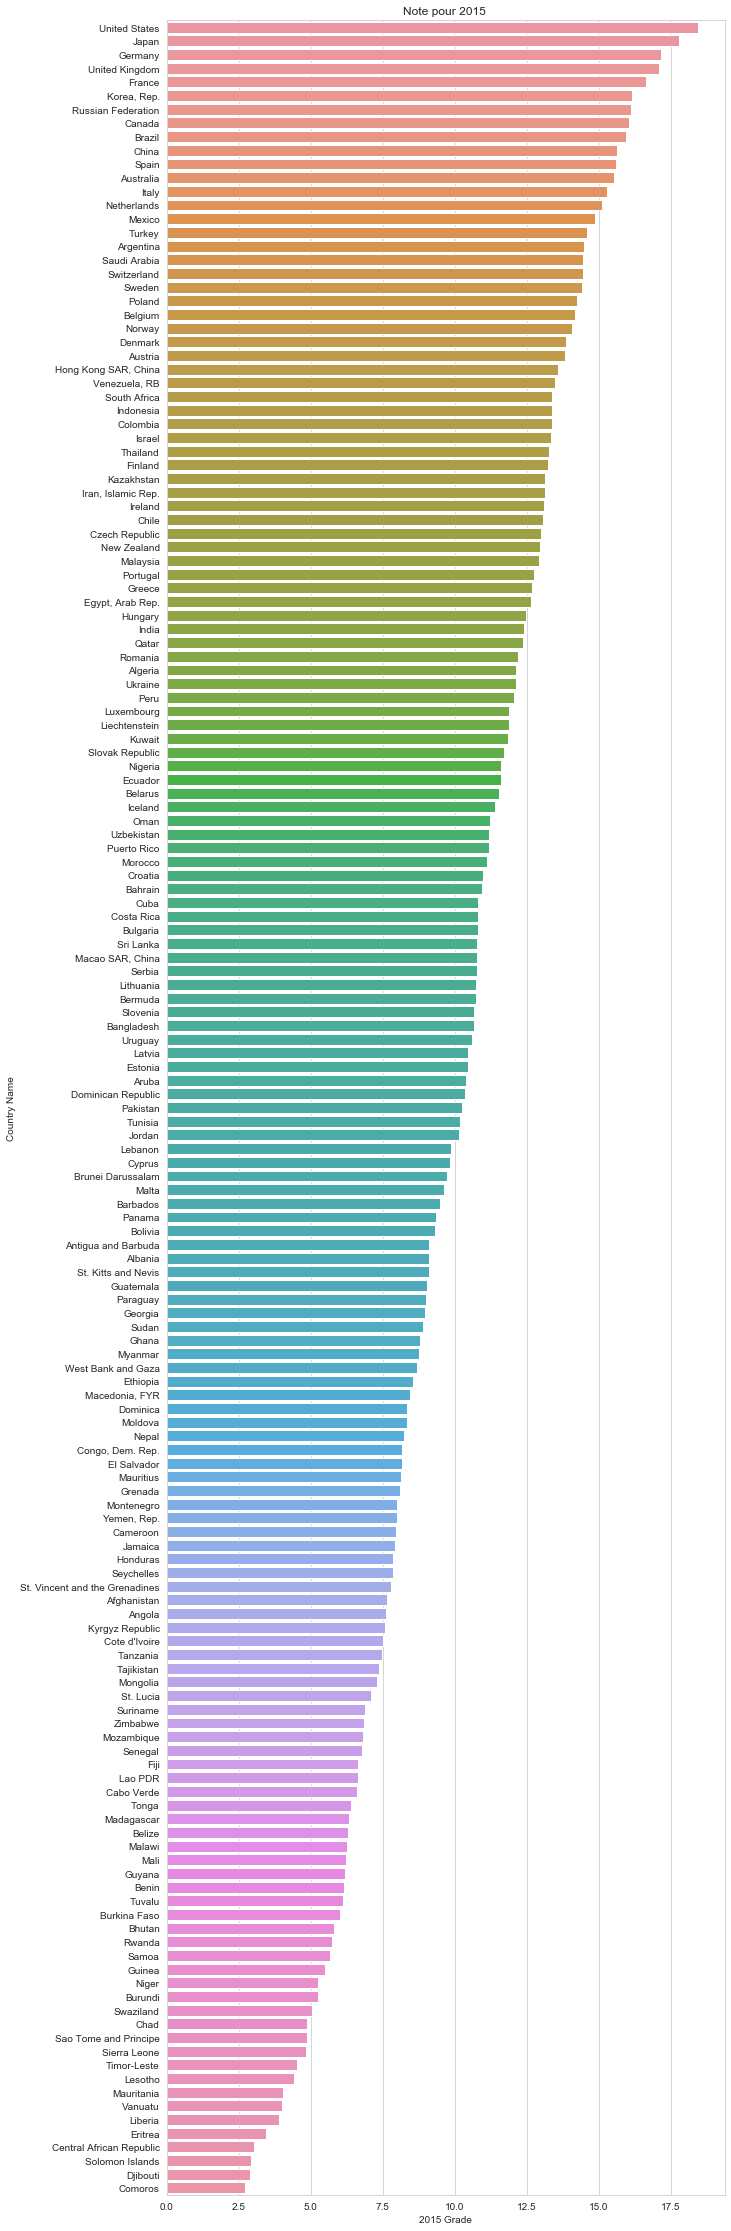

In [47]:
# barplot of 2015's grade for each country to evaluate grading
first_test_grade = first_test_grade.reindex(first_test_grade['2015 Grade'].sort_values(ascending=False).index)
plt.figure(figsize=(10,40))
sns.set_style("whitegrid")
g = sns.barplot(y=first_test_grade.index, x=first_test_grade['2015 Grade'])
plt.title('Note pour 2015 ')

In [48]:
data_manual[data_manual["Country Name"]=="China"]

Country Name Country Code  \
243135        China          CHN   
243225        China          CHN   
243265        China          CHN   
244423        China          CHN   

                                          Indicator Name  Indicator Code  \
243135                      GDP per capita (current US$)  NY.GDP.PCAP.CD   
243225  Gross enrolment ratio, secondary, both sexes (%)     SE.SEC.ENRR   
243265                   Internet users (per 100 people)  IT.NET.USER.P2   
244423                                 Population, total     SP.POP.TOTL   

                2010          2011          2012          2013          2014  \
243135  4.560513e+03  5.633796e+03  6.337883e+03  7.077771e+03  7.683503e+03   
243225  8.492116e+01  8.907794e+01  9.214325e+01  9.624175e+01  9.433207e+01   
243265  3.430000e+01  3.830000e+01  4.230012e+01  4.580000e+01  4.790000e+01   
244423  1.337705e+09  1.344130e+09  1.350695e+09  1.357380e+09  1.364270e+09   

                2015          Mean  2010 Grade  2011 Grade  2012 Grade  \
243135  8.069213e+03  5.623240e+03    1.339575    1.526151    1.630109   
243225  9.429921e+01  7.871648e+01    3.396846    3.563118    3.685730   
243265  5.030000e+01  3.698573e+01    1.372000    1.532000    1.692005   
244423  1.371220e+09  1.160771e+09    8.000000    8.000000    8.000000   

        2013 Grade  2014 Grade  2015 Grade  
243135    1.727582    1.800073    1.843313  
243225    3.849670    3.773283    3.771968  
243265    1.832000    1.916000    2.012000  
244423    8.000000    8.000000    8.000000

In [49]:
# Create a table showing the top 20 countries from 2010 to 2016 according to their grades

ranking_table = pd.DataFrame(index=range(1,21))

for i in range(2010,2016):
    title = str(i)+' Grade'
    ranking_table[str(i)]= first_test_grade.reindex(first_test_grade[title].sort_values(ascending=False).index).iloc[0:20].index

ranking_table

2010                2011                2012  \
1        United States       United States       United States   
2                Japan               Japan               Japan   
3              Germany             Germany             Germany   
4       United Kingdom              France              France   
5               France      United Kingdom      United Kingdom   
6               Canada              Canada  Russian Federation   
7          Korea, Rep.         Korea, Rep.              Canada   
8               Brazil              Brazil         Korea, Rep.   
9                Italy           Australia              Brazil   
10               Spain               Italy           Australia   
11         Netherlands               Spain               Spain   
12           Australia         Netherlands               Italy   
13  Russian Federation  Russian Federation         Netherlands   
14              Sweden               China               China   
15               China              Sweden              Sweden   
16              Norway         Switzerland         Switzerland   
17         Switzerland             Belgium              Norway   
18              Poland              Norway             Belgium   
19             Belgium              Poland              Mexico   
20             Denmark              Mexico              Poland   

                  2013                2014                2015  
1        United States       United States       United States  
2                Japan               Japan               Japan  
3              Germany             Germany             Germany  
4       United Kingdom      United Kingdom      United Kingdom  
5               France              France              France  
6   Russian Federation  Russian Federation         Korea, Rep.  
7               Canada              Canada  Russian Federation  
8               Brazil              Brazil              Canada  
9          Korea, Rep.         Korea, Rep.              Brazil  
10           Australia               Spain               China  
11               Italy           Australia               Spain  
12               Spain               China           Australia  
13               China               Italy               Italy  
14         Netherlands         Netherlands         Netherlands  
15              Sweden              Sweden              Mexico  
16              Turkey              Turkey              Turkey  
17         Switzerland         Switzerland           Argentina  
18              Mexico              Mexico        Saudi Arabia  
19        Saudi Arabia        Saudi Arabia         Switzerland  
20             Belgium             Belgium              Sweden

Représentation graphique des indicateurs pour le pays sélectionnée:  France 
 --------- 



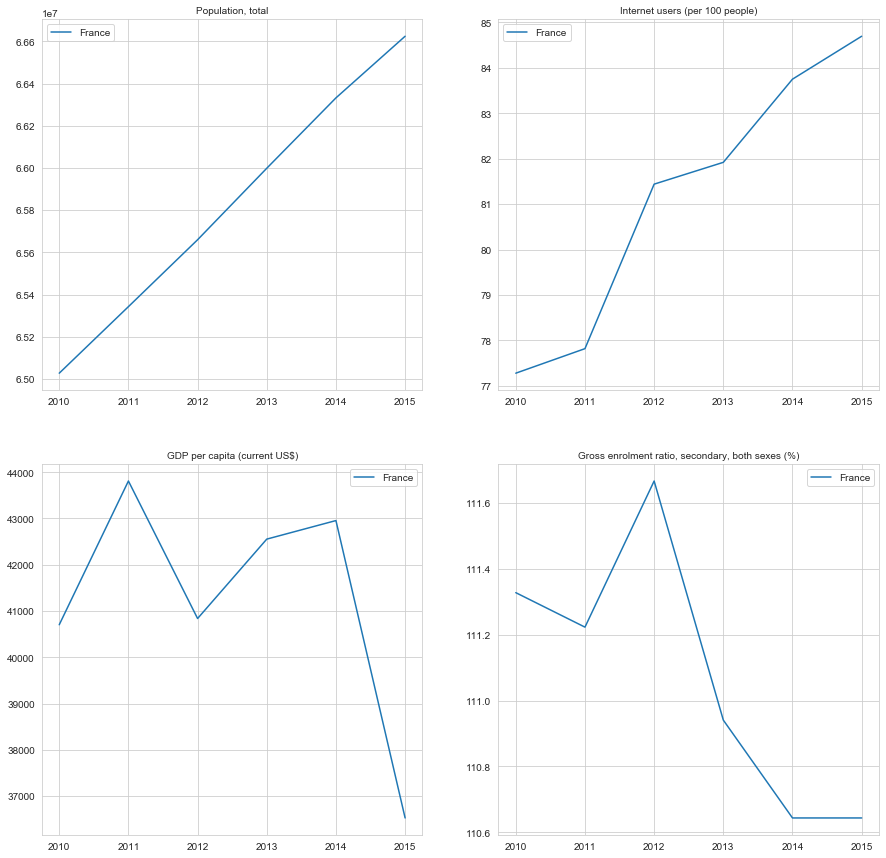

In [50]:
# Final tool of the study, here the goal is to have an overview of a country with update only the 2 first variables : 
# my_country and year_studied


my_country = 'France'
#choose between following values : 2010,2011,2012,2013,2014,2015 
year_studied =2011
studied = str(year_studied)+' Grade'

graph_table = data_manual.reindex(columns=['Country Name','Indicator Name','2010','2011','2012','2013','2014','2015'])
print('Représentation graphique des indicateurs pour le pays sélectionnée: ',my_country,"\n --------- \n")
fig, axs = plt.subplots(2,2, figsize=(15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()

# Using a for loop to create 1 graph per indicator in the 'relevant_indicator' list
for ind in range(0,len(relevant_indicators)):
    graph_table = data_manual.reindex(columns=['Country Name','Indicator Name','2010','2011','2012','2013','2014','2015'])
    graph_table = graph_table.loc[graph_table['Indicator Name']==relevant_indicators[ind]]
    graph_table = graph_table.loc[graph_table['Country Name']==my_country]
    graph_table = graph_table.drop(columns=['Indicator Name'])
    graph_table = graph_table.set_index('Country Name')
    graph_table = graph_table.transpose()
   
    sns.lineplot(data=graph_table,ax=axs[ind])
    axs[ind].set_title(relevant_indicators[ind],fontsize=10)

# This part is used to represent the chosen country performances with a radar plot
    
data_radar = data_manual.copy()    
data_radar = data_radar.reindex(columns=['Country Name','Indicator Name',studied])
data_radar = data_radar.loc[data_radar['Country Name']==my_country]

# We want the graph to display a pourcentage of the grade for each indicator 
# so that the radar graph can be obersved without knowing what is the maximum grade for each indicator
for i in range(len(relevant_indicators)):
    data_radar.iat[i,2] /= notation.at[data_radar.iat[i,1],'Note']

# This part is used to be able to display the rank of the country in the title
ranking = data_manual.reindex(columns=['Country Name','2010 Grade','2011 Grade','2012 Grade','2013 Grade','2014 Grade','2015 Grade'])
ranking = ranking.groupby(['Country Name']).sum()
ranking['rank']=ranking[studied].rank(ascending=False)
ranking = ranking.astype({"rank": int})

fig = px.line_polar(data_radar, r=studied, theta='Indicator Name', line_close=True)

fig.update_layout(title="Performance de {}, classé {}ème en {}".format(my_country,ranking.loc[my_country,'rank'],year_studied))
fig.update_traces(fill='toself')
fig.show()   
